In [1]:
import pandas as pd 
import numpy as np
import matplotlib.pyplot as plt 
import openpyxl

In [2]:
retail = pd.read_excel(r'C:\Users\oxysa\Desktop\NAVTACC\Online Retail.xlsx',engine='openpyxl')
retail.rename(columns=str.lower,inplace=True)
retail.head()

,invoiceno,stockcode,description,quantity,invoicedate,unitprice,customerid,country
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,2010-12-01 08:26:00,2.55,17850.0,United Kingdom
1,536365,71053,WHITE METAL LANTERN,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,2010-12-01 08:26:00,2.75,17850.0,United Kingdom
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom


##### 2. Data Cleaning

In [3]:
# drop all none or NaN values :
retail.dropna(inplace=True)

In [4]:
# Drop qunantity that are 0 and less than 0
retail.drop(retail[retail['quantity'] <= 0].index,inplace=True)


##### 3.Summary Statistics

In [5]:
retail['total_revenue'] = retail.quantity*retail.unitprice
retail

,invoiceno,stockcode,description,quantity,invoicedate,unitprice,customerid,country,total_revenue
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,2010-12-01 08:26:00,2.55,17850.0,United Kingdom,15.30
1,536365,71053,WHITE METAL LANTERN,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom,20.34
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,2010-12-01 08:26:00,2.75,17850.0,United Kingdom,22.00
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom,20.34
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom,20.34
...,...,...,...,...,...,...,...,...,...
541904,581587,22613,PACK OF 20 SPACEBOY NAPKINS,12,2011-12-09 12:50:00,0.85,12680.0,France,10.20
541905,581587,22899,CHILDREN'S APRON DOLLY GIRL,6,2011-12-09 12:50:00,2.10,12680.0,France,12.60
541906,581587,23254,CHILDRENS CUTLERY DOLLY GIRL,4,2011-12-09 12:50:00,4.15,12680.0,France,16.60
541907,581587,23255,CHILDRENS CUTLERY CIRCUS PARADE,4,2011-12-09 12:50:00,4.15,12680.0,France,16.60


In [6]:
retail.groupby('invoiceno')['total_revenue'].mean()

invoiceno
536365    19.874286
536366    11.100000
536367    23.227500
536368    17.512500
536369    17.850000
            ...    
581583    62.300000
581584    70.320000
581585    15.669048
581586    84.800000
581587    16.630000
Name: total_revenue, Length: 18536, dtype: float64

In [7]:
retail.groupby('description')['quantity'].sum()

description
 4 PURPLE FLOCK DINNER CANDLES       140
 50'S CHRISTMAS GIFT BAG LARGE      1885
 DOLLY GIRL BEAKER                  2398
 I LOVE LONDON MINI BACKPACK         360
 I LOVE LONDON MINI RUCKSACK           1
                                    ... 
ZINC T-LIGHT HOLDER STARS SMALL     4894
ZINC TOP  2 DOOR WOODEN SHELF         10
ZINC WILLIE WINKIE  CANDLE STICK    2607
ZINC WIRE KITCHEN ORGANISER           25
ZINC WIRE SWEETHEART LETTER TRAY      80
Name: quantity, Length: 3877, dtype: int64

##### 5.Monthely Revenue Analysis:

In [8]:
# Extract the date untill YYYY-MM From YYYY-MM-DD HH:MM:SS
retail['Month'] = retail['invoicedate'].dt.to_period('M')
retail

,invoiceno,stockcode,description,quantity,invoicedate,unitprice,customerid,country,total_revenue,Month
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,2010-12-01 08:26:00,2.55,17850.0,United Kingdom,15.30,2010-12
1,536365,71053,WHITE METAL LANTERN,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom,20.34,2010-12
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,2010-12-01 08:26:00,2.75,17850.0,United Kingdom,22.00,2010-12
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom,20.34,2010-12
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom,20.34,2010-12
...,...,...,...,...,...,...,...,...,...,...
541904,581587,22613,PACK OF 20 SPACEBOY NAPKINS,12,2011-12-09 12:50:00,0.85,12680.0,France,10.20,2011-12
541905,581587,22899,CHILDREN'S APRON DOLLY GIRL,6,2011-12-09 12:50:00,2.10,12680.0,France,12.60,2011-12
541906,581587,23254,CHILDRENS CUTLERY DOLLY GIRL,4,2011-12-09 12:50:00,4.15,12680.0,France,16.60,2011-12
541907,581587,23255,CHILDRENS CUTLERY CIRCUS PARADE,4,2011-12-09 12:50:00,4.15,12680.0,France,16.60,2011-12


In [14]:
# Total revenue in a month
monthly_rev = retail.groupby('Month')['total_revenue'].sum()

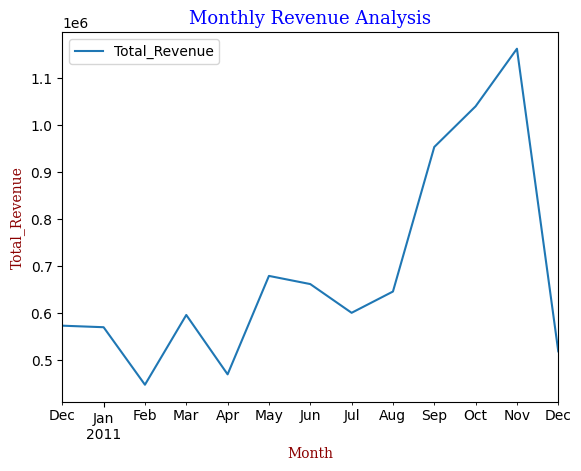

In [19]:
monthly_rev.plot()
font1 = {'family':'serif','color':'blue','size':13}
font2 = {'family':'serif','color':'darkred','size':10}
plt.title("Monthly Revenue Analysis",font1)
plt.xlabel('Month',font2)
plt.ylabel("Total_Revenue",font2)
plt.legend(['Total_Revenue'])
plt.show()

In [29]:
pro_reve = retail.groupby('description')['total_revenue'].sum()
pro_reve = pro_reve.sort_values(ascending=False).head(5)
pro_reve

description
PAPER CRAFT , LITTLE BIRDIE           168469.60
REGENCY CAKESTAND 3 TIER              142592.95
WHITE HANGING HEART T-LIGHT HOLDER    100448.15
JUMBO BAG RED RETROSPOT                85220.78
MEDIUM CERAMIC TOP STORAGE JAR         81416.73
Name: total_revenue, dtype: float64

Text(0.5, 1.0, 'Top 5 Product Revenue Analaysis')

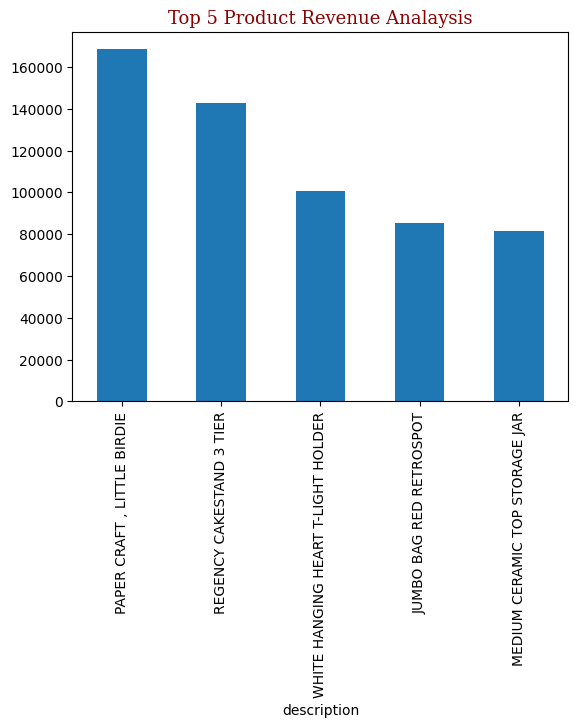

In [56]:
pro_reve.plot(kind='bar')
font2 = {'family':'serif','color':'darkred','size':13}
plt.title("Top 5 Product Revenue Analaysis",font2)

##### 6. Customer Analysis

In [49]:
# Total Revenue For Each Customer Id
cust_rev = retail.groupby('customerid')['total_revenue'].sum()
cust_rev


customerid
12346.0    77183.60
12347.0     4310.00
12348.0     1797.24
12349.0     1757.55
12350.0      334.40
             ...   
18280.0      180.60
18281.0       80.82
18282.0      178.05
18283.0     2094.88
18287.0     1837.28
Name: total_revenue, Length: 4339, dtype: float64

In [50]:
# Highest Total Revenue with Customer ID
cust_rev = cust_rev.sort_values(ascending=False).head(1)
cust_rev

customerid
14646.0    280206.02
Name: total_revenue, dtype: float64

##### 7.Quantity vs Revenue Correlation

In [54]:
corr = retail['quantity'].corr(retail['total_revenue'])
print(f'Correlation Between Quantity and Total Revenue =  {corr:.4f}')

Correlation Between Quantity and Total Revenue =  0.9088
